In [ ]:
# !pip install backtrader yfinance

In [ ]:
import backtrader as bt
import datetime
import yfinance as yf
import matplotlib.pyplot as plt
# %matplotlib inline


In [ ]:
df = yf.download("AAPL",start="2010-01-01")

[*********************100%***********************]  1 of 1 completed


## Data Exploration

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04 00:00:00-05:00,7.622500,7.660714,7.585000,7.643214,6.526021,493729600
2010-01-05 00:00:00-05:00,7.664286,7.699643,7.616071,7.656429,6.537303,601904800
2010-01-06 00:00:00-05:00,7.656429,7.686786,7.526786,7.534643,6.433319,552160000
2010-01-07 00:00:00-05:00,7.562500,7.571429,7.466071,7.520714,6.421425,477131200
2010-01-08 00:00:00-05:00,7.510714,7.571429,7.466429,7.570714,6.464116,447610800
...,...,...,...,...,...,...
2022-10-04 00:00:00-04:00,145.029999,146.220001,144.259995,146.100006,146.100006,87830100
2022-10-05 00:00:00-04:00,144.070007,147.380005,143.009995,146.399994,146.399994,79471000
2022-10-06 00:00:00-04:00,145.809998,147.539993,145.220001,145.429993,145.429993,68402200


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3215.000000,3215.000000,3215.000000,3215.000000,3215.000000,3.215000e+03
mean,49.671986,50.218355,49.137079,49.698417,47.894794,2.593342e+08
std,46.121204,46.706249,45.560858,46.156276,46.657483,2.233056e+08
min,6.870357,7.000000,6.794643,6.858929,5.856371,4.100000e+07
25%,18.881071,19.012679,18.678572,18.872500,16.553996,1.040724e+08
50%,29.377501,29.552500,29.122499,29.367500,27.142498,1.696308e+08
75%,54.780001,55.416250,54.267500,54.783751,53.161257,3.527636e+08
max,182.630005,182.940002,179.119995,182.009995,181.259918,1.880998e+09


In [ ]:
import seaborn as sns

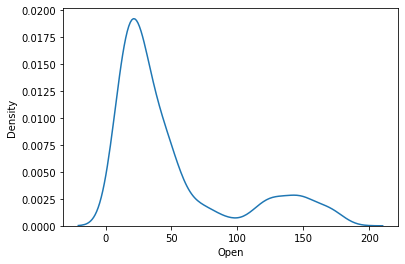

In [ ]:
sns.kdeplot(df['Open'])

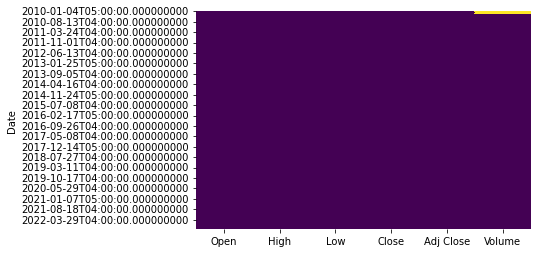

In [ ]:
data2 = df.copy()
data2.iloc[1:50,data2.columns.get_loc('Volume')] = None
sns.heatmap(data2.isnull(),cbar=False,cmap = 'viridis') # to check null values

In [ ]:
df['open-high'] = df['Open']-df['High']
df['open-low'] = df['Open'] - df['Low']
df['close-high'] = df['Close']-df['High']
df['close-low'] = df['Close'] - df['Low']
df['high-low'] = df['High'] - df['Low']
df['open-close'] = df['Open'] - df['Close']
df.head()

,Open,High,Low,Close,Adj Close,Volume,open-high,open-low,close-high,close-low,high-low,open-close
Date,,,,,,,,,,,,
2010-01-04 00:00:00-05:00,7.622500,7.660714,7.585000,7.643214,6.526021,493729600,-0.038214,0.037500,-0.017500,0.058214,0.075714,-0.020714
2010-01-05 00:00:00-05:00,7.664286,7.699643,7.616071,7.656429,6.537303,601904800,-0.035357,0.048215,-0.043214,0.040358,0.083572,0.007857
2010-01-06 00:00:00-05:00,7.656429,7.686786,7.526786,7.534643,6.433319,552160000,-0.030357,0.129643,-0.152143,0.007857,0.160000,0.121786
2010-01-07 00:00:00-05:00,7.562500,7.571429,7.466071,7.520714,6.421425,477131200,-0.008929,0.096429,-0.050715,0.054643,0.105358,0.041786
2010-01-08 00:00:00-05:00,7.510714,7.571429,7.466429,7.570714,6.464116,447610800,-0.060715,0.044285,-0.000715,0.104285,0.105000,-0.060000


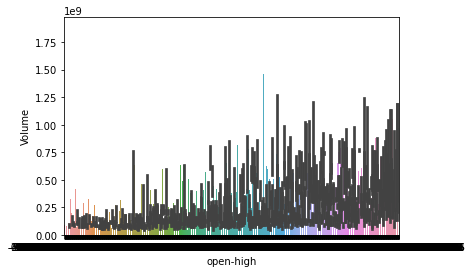

In [ ]:
sns.barplot(data=df, x = "open-high", y="Volume")

In [ ]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'open-high',
       'open-low', 'close-high', 'close-low', 'high-low', 'open-close'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


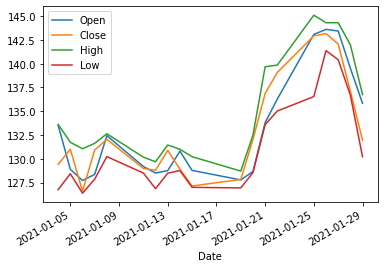

In [ ]:
df["2021-01"][['Open','Close','High','Low']].plot()

## Backtrader

In [ ]:
cerebro = bt.Cerebro()


In [ ]:
feed = bt.feeds.PandasData(dataname=df)

In [ ]:
cerebro.adddata(feed)

### Strategy

In [ ]:
class SmaCross(bt.Strategy):
    # list of parameters which are configurable for the strategy
    # params = dict(
    #     pfast=10,  # period for the fast moving average
    #     pslow=30   # period for the slow moving average
    # )

    def __init__(self):
        sma1 = bt.ind.SMA(period=50)  # fast moving average
        sma2 = bt.ind.SMA(period=100)  # slow moving average
        self.crossover = bt.ind.CrossOver(sma1, sma2)  # crossover signal

    def next(self):
        if not self.position:  # not in the market
            if self.crossover > 0:  # if fast crosses slow to the upside
                self.buy()  # enter long

        elif self.crossover < 0:  # in the market & cross to the downside
            self.close()  # close long position


In [ ]:
cerebro.addstrategy(SmaCross)

0

In [ ]:
cerebro.broker.setcommission(commission=0.005)

In [ ]:
cerebro.addsizer(bt.sizers.PercentSizer,percents=50)

In [ ]:
cerebro.addanalyzer(bt.analyzers.AnnualReturn,_name="areturn")

In [ ]:
testcrat = cerebro.run()

<IPython.core.display.Javascript object>

[[<Figure size 432x288 with 5 Axes>]]

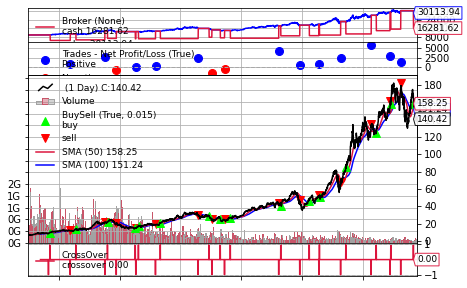

In [ ]:
cerebro.plot()

In [ ]:
testcrat[0].analyzers.areturn.get_analysis()

OrderedDict([(2010, 0.06772468644087026),
             (2011, 0.03246097891406752),
             (2012, 0.18553556062089882),
             (2013, 0.061742789480944804),
             (2014, 0.11600161859624114),
             (2015, -0.01762091328081683),
             (2016, -0.03929075007137739),
             (2017, 0.23874971399796063),
             (2018, 0.04834373025533267),
             (2019, 0.25283494928092454),
             (2020, 0.18236885143688863),
             (2021, 0.15258338972178875),
             (2022, -0.07069491261572425)])